In [1]:
# pillow图片处理
from PIL import Image, ImageFilter

im = Image.open('girl.jpg')
w, h = im.size
print('with = %d, height = %d' % (w, h))
im.thumbnail((w // 2, h // 2))
im.save('girl_thumb.jpg')

im = Image.open('girl.jpg')
im2 = im.filter(ImageFilter.BLUR)
im2.save('girl_blur.jpg', 'jpeg')

with = 900, height = 577


In [3]:
# requests处理web请求
import requests

In [6]:
url = 'http://www.baidu.com'
r = requests.get(url)
# print(r.text)
print(r.status_code)
print(r.encoding)
text = r.text.encode('ISO-8859-1').decode('utf-8') # 页面声明的编码与实际编码不符
print(text)

200
ISO-8859-1
<!DOCTYPE html>
<!--STATUS OK--><html> <head><meta http-equiv=content-type content=text/html;charset=utf-8><meta http-equiv=X-UA-Compatible content=IE=Edge><meta content=always name=referrer><link rel=stylesheet type=text/css href=http://s1.bdstatic.com/r/www/cache/bdorz/baidu.min.css><title>百度一下，你就知道</title></head> <body link=#0000cc> <div id=wrapper> <div id=head> <div class=head_wrapper> <div class=s_form> <div class=s_form_wrapper> <div id=lg> <img hidefocus=true src=//www.baidu.com/img/bd_logo1.png width=270 height=129> </div> <form id=form name=f action=//www.baidu.com/s class=fm> <input type=hidden name=bdorz_come value=1> <input type=hidden name=ie value=utf-8> <input type=hidden name=f value=8> <input type=hidden name=rsv_bp value=1> <input type=hidden name=rsv_idx value=1> <input type=hidden name=tn value=baidu><span class="bg s_ipt_wr"><input id=kw name=wd class=s_ipt value maxlength=255 autocomplete=off autofocus></span><span class="bg s_btn_wr"><input type=s

In [8]:
r = requests.get('https://github.com/timeline.json')
print(r.text)
# print(r.json())
j_data = r.json()
print(j_data['documentation_url'])

{"message":"Hello there, wayfaring stranger. If you’re reading this then you probably didn’t see our blog post a couple of years back announcing that this API would go away: http://git.io/17AROg Fear not, you should be able to get what you need from the shiny new Events API instead.","documentation_url":"https://developer.github.com/v3/activity/events/#list-public-events"}
https://developer.github.com/v3/activity/events/#list-public-events


In [9]:
r = requests.get('http://i-2.shouji56.com/2015/2/11/23dab5c5-336d-4686-9713-ec44d21958e3.jpg', stream = True)
with open('meinv2.jpg', 'wb+') as f:
    for chunk in r.iter_content(1024):
        f.write(chunk)

In [12]:
# 利用requests实现豆瓣模拟登陆
from bs4 import BeautifulSoup

ua = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36'
headers ={'user-agent':ua}
url_login = 'https://accounts.douban.com/login'

session = requests.Session()
formdata = {'redir':'https://www.douban.com',
            'form_email':'regdzz.lin@gmail.com',
            'form_password':'Julyedu123!'}
resp = session.post(url_login,
                    data=formdata,
                    headers=headers)
bs = BeautifulSoup(resp.text, 'html5lib')
captcha = bs.select('img#captcha_image')
if captcha:
    captcha = captcha[0]
    # 处理验证码
    print(captcha.text)
    img_url = captcha.get('src').strip()
    print(img_url)
    id_ = img_url.split('?')[1].split('&')[0].split('=')[1]
    text = input('请输入验证码')
    formdata['captcha-solution'] = text
    formdata['captcha-id'] = id_
    resp = session.post(url_login,
                        data=formdata,
                        headers=headers)
with open('douban.txt', 'w+', encoding='utf-8') as f:
    f.write(resp.text)


https://www.douban.com/misc/captcha?id=KXvakZi2Dm1Np9f9dTm2YenO:en&size=s
请输入验证码value


In [14]:
# psutil
import psutil

print(psutil.cpu_count())
print(psutil.cpu_count(logical=False))
print(psutil.cpu_times())
print(psutil.cpu_percent(interval=1, percpu=True))
print(psutil.virtual_memory())
print(psutil.swap_memory())
print(psutil.disk_partitions())
print(psutil.disk_usage('/'))
print(psutil.disk_io_counters())

4
4
scputimes(user=182690.265625, system=96698.9375, idle=613598.125, interrupt=5254.203125, dpc=3198.1718788146973)
[64.6, 54.7, 63.1, 70.8]
svmem(total=8474083328, available=4707864576, percent=44.4, used=3766218752, free=4707864576)
sswap(total=9816260608, used=4558770176, free=5257490432, percent=46.4, sin=0, sout=0)
[sdiskpart(device='C:\\', mountpoint='C:\\', fstype='NTFS', opts='rw,fixed'), sdiskpart(device='D:\\', mountpoint='D:\\', fstype='NTFS', opts='rw,fixed')]
sdiskusage(total=136845455360, used=86779133952, free=50066321408, percent=63.4)
sdiskio(read_count=1637216, write_count=2300230, read_bytes=67020790272, write_bytes=41643082240, read_time=209578971, write_time=380313229)


In [19]:
pids = psutil.pids() # 获取当前所有进程id
print(pids)
# p = psutil.Process(pids[5])
p = psutil.Process(3540)
print(p.name())
print(p.cwd())
print(p.status())

[0, 4, 324, 524, 604, 740, 748, 832, 908, 796, 792, 516, 1052, 1060, 1168, 1316, 1580, 1756, 1824, 1840, 1868, 1980, 1652, 2476, 2512, 2600, 2716, 2740, 2796, 3364, 3576, 3680, 3736, 6992, 16280, 13756, 6500, 11780, 9384, 10876, 14472, 1020, 6704, 5700, 1876, 6256, 16136, 10780, 2184, 12300, 8580, 9320, 4792, 252, 15384, 7780, 4836, 1396, 9424, 9120, 12836, 7804, 7324, 5080, 1596, 868, 7480, 4008, 15216, 3540, 15376, 15556, 9492, 11804, 7388, 12688, 1000, 1724, 3976, 9592, 4988, 7648, 11484, 2712, 2028, 3764, 12044, 9044, 16188, 4952, 1048, 11220, 10432, 8612, 10256, 12860, 11652, 4932]
python.exe
C:\Users\linying\Downloads\120910晚上课程
running


In [ ]:
# 简易redis封装
import redis

class Queue:
    def __init__(self, name):
        self._db = redis.Redis(host='localhost', port='6739')
        self.key = '%s:%s' % ('redis_demo', name)

    def qsize(self):
        return self._db.llen(self.key)

    def empty(self):
        return self.qsize() == 0

    def put(self, item):
        self._db.rpush(self.key, item)

    def get(self, block=True, timeout=None):
        if block: # 阻塞
            item = self._db.blpop(self.key, timeout=timeout)
            if item:
                item = item[1]
        else: # 非阻塞
            item = self._db.lpop(self.key)
        return item

In [ ]:
# peewee访问数据库
# 参考链接：https://github.com/yingl/bdsf

In [20]:
# numpy
import numpy as np

array_3x3 = np.arange(9).reshape(3,3)
x = np.matrix(array_3x3) 
y = np.mat(np.identity(3))
print(x)
print(y)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [21]:
print(x + y)

[[ 1.  1.  2.]
 [ 3.  5.  5.]
 [ 6.  7.  9.]]


In [22]:
print(np.dot(x, x))

[[ 15  18  21]
 [ 42  54  66]
 [ 69  90 111]]


In [23]:
print(x ** 3)

[[ 180  234  288]
 [ 558  720  882]
 [ 936 1206 1476]]


In [24]:
z = np.matrix(np.random.random_integers(1, 50, 9).reshape(3,3))
print(z)
print(z.I) # 逆矩阵

[[48 28 28]
 [16 48 21]
 [37 32 46]]
[[ 0.03890183 -0.00992807 -0.019147  ]
 [ 0.0010384   0.02968291 -0.01418296]
 [-0.03201297 -0.01266336  0.04700638]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 50 + 1) instead
  if __name__ == '__main__':


In [25]:
# 解线性方程组
# 30x + 50y = 260
# 17x + 6y = 58
a = np.matrix([[30, 50], [17, 6]])
b = np.matrix([[260], [58]])
xy =a.I * b
print(xy) # x = 2, y = 4

[[ 2.]
 [ 4.]]


In [27]:
# pandas数据分析与绘图
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

%matplotlib inline

In [28]:
# 加载数据
result_df = pd.read_csv('2016-us-ge-by-county.csv')
result_df.drop('StateCode', axis=1, inplace=True)
result_df.drop('CountyFips', axis=1, inplace=True)
result_df.head()

,StateName,CountyName,CountyTotalVote,Party,Candidate,VoteCount
0,alaska,Alaska,246588,GOP,Trump,130415.0
1,alabama,Macon,8748,GOP,Trump,1394.0
2,alabama,Wilcox,6095,GOP,Trump,1737.0
3,alabama,Coosa,5223,GOP,Trump,3376.0
4,alabama,Blount,25384,GOP,Trump,22808.0


In [29]:
# 提取Trump和希拉里数据
trump_df = result_df[result_df['Candidate'] == 'Trump']
clinton_df = result_df[result_df['Candidate'] == 'Clinton']
# trump_df.info()
# trump_df.head()

In [38]:
# 合并成一张表并且按州分组
result_df = pd.merge(trump_df, clinton_df, on=['StateName', 'CountyName', 'CountyTotalVote'], suffixes=['_t', '_c'])
result_df.drop('Party_t', axis=1, inplace=True)
result_df.drop('Party_c', axis=1, inplace=True)
result_df.drop('Candidate_t', axis=1, inplace=True)
result_df.drop('Candidate_c', axis=1, inplace=True)
result_df.columns = ['StateName', 'CountyName', 'TotalVote', 'VoteTrump', 'VoteClinton']
result_df = result_df.groupby(by=result_df['StateName'], as_index=False).sum() # 试下as_index不同值的区别
print(result_df)
result_df.drop([8], inplace=True) # 删除district-of-columbia
result_df['T-Ratio'] = result_df['VoteTrump'] / result_df['TotalVote']
result_df['C-Ratio'] = result_df['VoteClinton'] / result_df['TotalVote']
result_df['Winner'] = list(map(lambda x, y: 'Trump' if x > y else 'Clinton', result_df['T-Ratio'], result_df['C-Ratio']))
print(result_df.head())
print(result_df['Winner'].value_counts())

               StateName  TotalVote  VoteTrump  VoteClinton
0                alabama    2078165  1306925.0     718084.0
1                 alaska     246588   130415.0      93007.0
2                arizona    1960053   972900.0     888374.0
3               arkansas    1121684   677904.0     378729.0
4             california    8930459  2969532.0    5488261.0
5               colorado    2401267  1075770.0    1126384.0
6            connecticut    1528817   637919.0     823360.0
7               delaware     441535   185103.0     235581.0
8   district-of-columbia     280272    11553.0     260223.0
9                florida    9386750  4605515.0    4485745.0
10               georgia    4029564  2068623.0    1837300.0
11                hawaii     428825   128815.0     266827.0
12                 idaho     688235   407199.0     189677.0
13              illinois    5374280  2118179.0    2977498.0
14               indiana    2717840  1555020.0    1029197.0
15                  iowa    1542880   79

In [39]:
# 加载收入数据，来源：https://en.wikipedia.org/wiki/List_of_U.S._states_by_income
income_df = pd.read_csv('2015-us-income-by-county.csv')
income_df.info()
income_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
StateName    50 non-null object
Income       50 non-null int64
dtypes: int64(1), object(1)
memory usage: 880.0+ bytes


,StateName,Income
0,maryland,75847
1,hawaii,73486
2,alaska,73355
3,new-jersey,72222
4,connecticut,71346


In [40]:
# 合并收入数据
result_df = pd.merge(result_df, income_df, on=['StateName'])
result_df.head()

,StateName,TotalVote,VoteTrump,VoteClinton,T-Ratio,C-Ratio,Winner,Income
0,alabama,2078165,1306925.0,718084.0,0.628884,0.345538,Trump,44765
1,alaska,246588,130415.0,93007.0,0.528878,0.377176,Trump,73355
2,arizona,1960053,972900.0,888374.0,0.496364,0.453240,Trump,51492
3,arkansas,1121684,677904.0,378729.0,0.604363,0.337643,Trump,41995
4,california,8930459,2969532.0,5488261.0,0.332517,0.614555,Clinton,64500


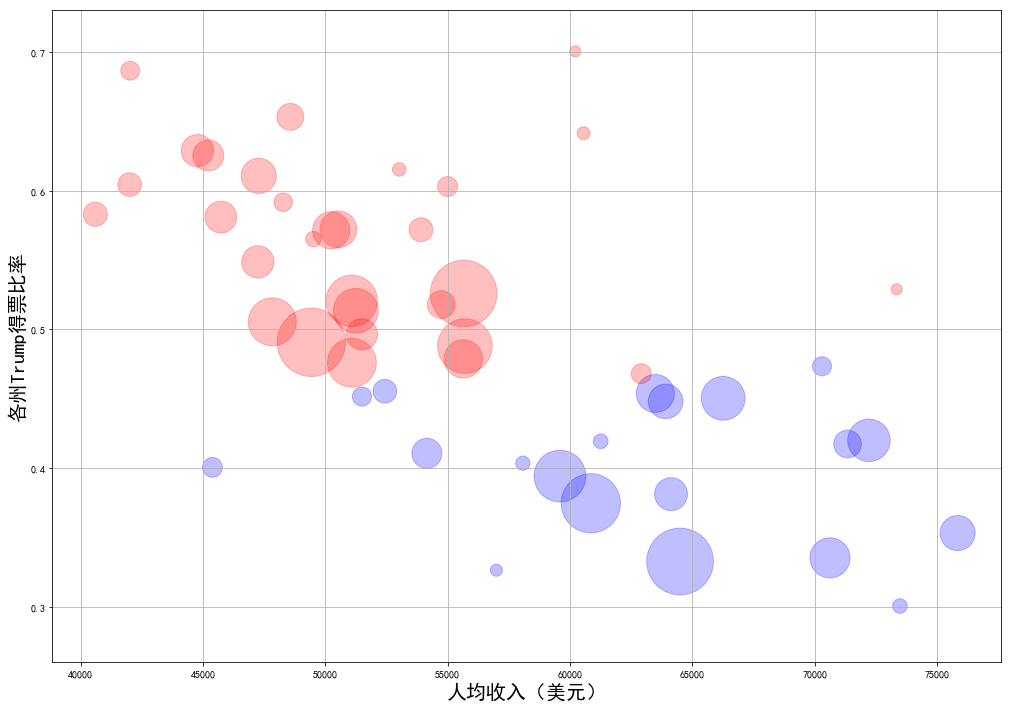

In [41]:
colors = result_df.Winner.map({'Trump':'Red', 'Clinton':'Blue'}) # 根据赢家设置颜色
spot_size = result_df.TotalVote / 2000.0 # 设置点大小
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.figure(figsize=(17, 12)) 
plt.scatter(x = result_df['Income'], y = result_df['T-Ratio'], s=spot_size, c=colors, alpha=0.25)
# plt.scatter( x = result_df['Income'], y = result_df['T-Ratio'], s=spot_size, alpha=0.25)
plt.xlabel('人均收入（美元）',fontsize=20)
plt.ylabel('各州Trump得票比率',fontsize=20)
plt.grid(True) # 添加网格
plt.show()

In [42]:
# matplotlib绘图

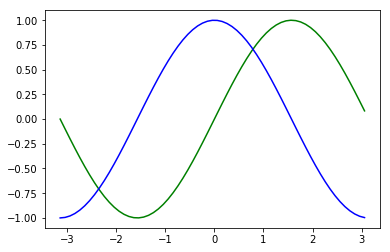

In [32]:
# 线型图 
x = np.arange(-np.pi, np.pi, 0.1)
ysin = np.sin(x)
ycos = np.cos(x)
plt.plot(x, ysin, 'g')
plt.plot(x, ycos, 'b')

<Container object of 12 artists>

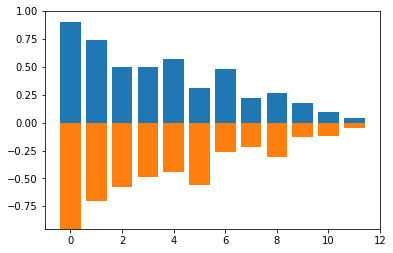

In [33]:
# 柱状图
n = 12
x = np.arange(12)
y1 = (1 - x / float(n)) * np.random.uniform(0.5, 1, n)
y2 = (1 - x / float(n)) * np.random.uniform(0.5, 1, n)
plt.bar(x, y1)
plt.bar(x, -y2)

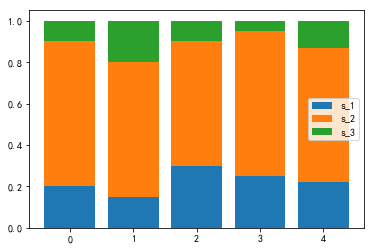

In [47]:
# 堆叠柱状图
x = np.arange(5)
s_1 = np.array([0.2, 0.15, 0.3, 0.25, 0.22])
s_2 = np.array([0.7, 0.65, 0.6, 0.7, 0.65])
s_3 = np.array([0.1, 0.2, 0.1, 0.05, 0.13])
plt.bar(x, s_1, label='s_1')
plt.bar(x, s_2, bottom=s_1, label='s_2')
plt.bar(x, s_3, bottom=(s_1 + s_2), label='s_3')
plt.legend()

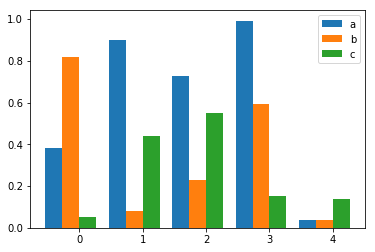

In [34]:
# 并列柱状图
total_width = 0.8 # 总宽度0.8
n = 3 # 3个柱子
width = total_width / n
x = np.arange(5)
x = x - (total_width / 2)
a = np.random.random(5)
b = np.random.random(5)
c = np.random.random(5)
plt.bar(x, a, width=width, label='a')
plt.bar(x + width, b, width=width, label='b')
plt.bar(x + width * 2, c, width=width, label='c')
plt.legend()

<Container object of 5 artists>

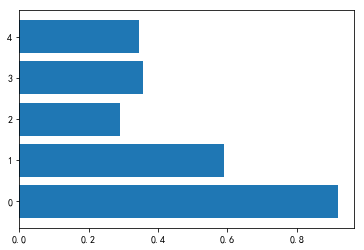

In [49]:
# 横向柱状图
x = np.arange(5)
a = np.random.random(5)
plt.barh(x, a)

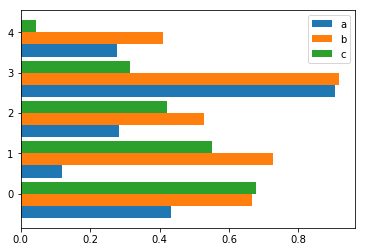

In [35]:
# 横向并列柱状图
total_height = 0.9 # 总宽度0.9
n = 3 # 3个柱子
height = total_height / n
x = np.arange(5)
x = x - (total_height / 2)
a = np.random.random(5)
b = np.random.random(5)
c = np.random.random(5)
plt.barh(x, a, height=height, label='a')
plt.barh(x + height, b, height=height, label='b')
plt.barh(x + height * 2, c, height=height, label='c')
plt.legend()

(array([ 0.08333333,  0.16666667,  0.25      ,  0.25      ,  0.33333333,
         0.41666667,  0.41666667,  0.5       ,  0.58333333,  0.75      ,
         0.83333333,  0.91666667,  0.91666667,  0.91666667,  0.91666667,
         0.91666667,  1.        ]),
 array([  0.        ,   0.94117647,   1.88235294,   2.82352941,
          3.76470588,   4.70588235,   5.64705882,   6.58823529,
          7.52941176,   8.47058824,   9.41176471,  10.35294118,
         11.29411765,  12.23529412,  13.17647059,  14.11764706,
         15.05882353,  16.        ]),
 <a list of 17 Patch objects>)

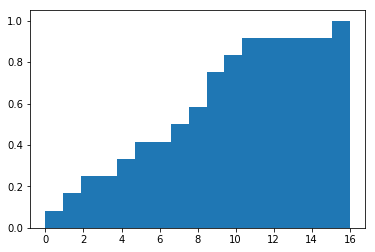

In [39]:
# 直方图
data = [0, 10, 8, 7, 11, 2, 4, 9, 16, 5, 1, 9]
# plt.hist(data, bins=(max(data) - min(data)) + 1, normed=True, cumulative=True)
plt.hist(data, bins=(max(data) - min(data)) + 1, normed=True, cumulative=True)

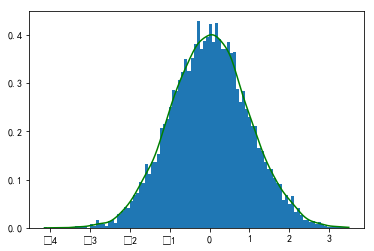

In [56]:
# 核密度曲线
data = np.random.randn(10000)
kde = mlab.GaussianKDE(data)
plt.hist(data, 100, normed=True)
x = np.linspace(data.min(), data.max(), 10000)
plt.plot(x, kde(x), 'g')

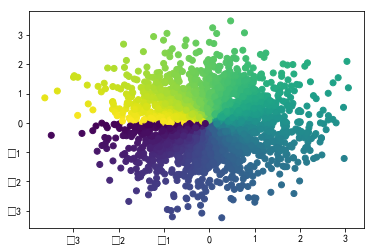

In [54]:
# 散点图
n = 2048
x = np.random.randn(n)
y = np.random.randn(n)
t = np.arctan2(y, x)
plt.scatter(x, y, c=t)

[ 0.          1.25663706  2.51327412  3.76991118  5.02654825  0.        ]
['leadership', 'force', 'wisdom', 'politics', 'charm']


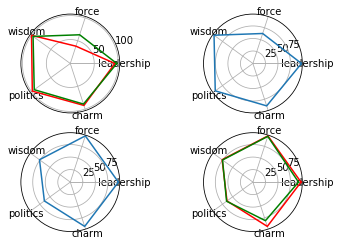

In [41]:
# 极坐标 - 能力图
fig = plt.figure()
ax_1 = plt.subplot(221, projection='polar')
ax_2 = plt.subplot(222, projection='polar')
ax_3 = plt.subplot(223, projection='polar')
ax_4 = plt.subplot(224, projection='polar')
labels = ['leadership', 'force', 'wisdom', 'politics', 'charm']
abilities = {'zgl': [93, 38, 100, 98, 92],
             'smy': [97, 63, 96, 93, 89],
             'gy': [96, 97, 76, 64, 93],
             'zy': [91, 96, 75, 65, 81]}
num = len(labels)
thetas = np.linspace(0, np.pi * 2, num, endpoint=False)
thetas = np.append(thetas, thetas[0])
abilities['zgl'].append(abilities['zgl'][0])
abilities['smy'].append(abilities['smy'][0])
abilities['gy'].append(abilities['gy'][0])
abilities['zy'].append(abilities['zy'][0])
print(thetas)
print(labels)
ax_1.set_xticks(thetas)
ax_1.set_xticklabels(labels)
ax_1.plot(thetas, abilities['zgl'], 'r')
ax_1.plot(thetas, abilities['smy'], 'g')
ax_2.set_xticks(thetas)
ax_2.set_xticklabels(labels)
ax_2.plot(thetas, abilities['smy'])
ax_3.set_xticks(thetas)
ax_3.set_xticklabels(labels)
ax_3.plot(thetas, abilities['gy'])
ax_4.set_xticks(thetas)
ax_4.set_xticklabels(labels)
ax_4.plot(thetas, abilities['gy'], 'r')
ax_4.plot(thetas, abilities['zy'], 'g')

In [ ]:
# Scrapy常用命令
# 创建新项目：scrapy startproject tutorial
# 生成爬虫：scrapy genspider mydomain mydomain.com
# 执行爬虫：scrapy crawl <spider>

In [ ]:
# 作业
# 利用pillow生成验证码
# 利用matplotlib实现饼图